In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [49]:
def corr2d(X, K):
    # kernel shape
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i+h, j:j+w] * K).sum()
    return Y

In [50]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super(Conv2D, self).__init__()
        self.weight = nn.Parameter(torch.randn(kernel_size))
        self.bias = nn.Parameter(torch.randn(1))
    
    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

# Edge Detection

In [51]:
X = torch.ones(6, 8)
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [52]:
torch.cat([X.unsqueeze(dim=0)]*3).permute(1, 2, 0).shape

torch.Size([6, 8, 3])

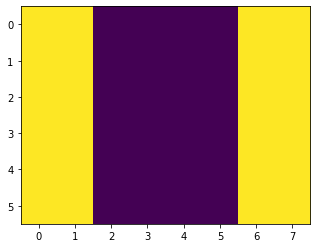

In [53]:
plt.imshow(X)

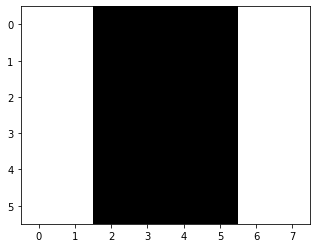

In [54]:
plt.imshow(torch.cat([X.unsqueeze(dim=0)]*3).permute(1, 2, 0))

In [58]:
# kernel
K = torch.tensor([[1, -1]])
Y = corr2d(X, K)

torch.Size([6, 7])

In [59]:
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [25]:
X.shape

torch.Size([6, 8])

In [26]:
a, b = X.shape

In [27]:
a

6